This is an example for the extension `displaytools` from the package [ipydex](https://github.com/cknoll/ipydex) for the IPython Notebook.

The extension introduces some "magic" comments (like `##:`, `##:T`, `##:S`, and `##:i` ) which trigger additional output (normally only the return value of the last line of a cell is printed). See below for [why is this useful?](#why-usefull)

Note that this extension is not yet in mature state and is likely to have some issues.

This example was tested successfully under python3.6. However it should also work on python 2.7.

In [1]:
%load_ext ipydex.displaytools

import ipydex
ipydex.__version__

'0.11.3'

In [2]:
import numpy as np
import sympy as sp
from sympy import sin, cos
from sympy.abc import t, pi
from sympy.interactive import printing
printing.init_printing()  # this activates latex rendering for better readable output

---

---

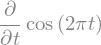

---

In [3]:
x = 2*pi*t
y1 = cos(x)
y2 = cos(x)*t
ydot1 = y1.diff(t) ##:
ydot2 = y2.diff(t) ##:
ydot1_obj = y1.diff(t, evaluate=False) ##:

---

If there is no assignment taking place, `##:` nevertheless causes the display of the respective result.

In [4]:
y1.diff(t,t) ##:
y2.diff(t,t) ##:

---

---

### Transposition

Sometimes, it can save much space if some return value is displayed in transposed form (while still being assigned not transposed). Compare these examples:

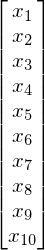

---

---

---

In [5]:
xx = sp.Matrix(sp.symbols('x1:11')) ##:
yy = sp.Matrix(sp.symbols('y1:11')) ##:T

xx.shape, yy.shape ##:

Sometimes the actual content is not of interest or simply too big to be displayed. Nevertheless the *shape* is already informative.

In [6]:
zz = sp.Matrix(sp.symbols('z1:101')) ##:S
zz2 = np.arange(70).reshape(14, -1) ##:S

---

---

In [7]:
# special comments can be combined with other comments:
a = 3 # comment ##:

---

In [8]:
# Multiline statements are not yet supported:
a = [1, 
     2] ##:


# indented lines are

def f(x):
    b = [10+x, 20] ##:
    return b


# in the case of multiple assignments the rightmost is taken:

c1, c2 = cc = [100, 200] ##:

res = f(3)
res = f(4)


---

---

---

---

In [9]:
# numpy arrays and matrices are indented to take left-hand-side into account


np.random.seed(0)

A = np.random.random((5, 4)) ##:
np.matrix(A) ##:

# heuristic to insert a newline if indentation would be too long
A_with_long_name = A ##:



A := array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318],
            [0.4236548 , 0.64589411, 0.43758721, 0.891773  ],
            [0.96366276, 0.38344152, 0.79172504, 0.52889492],
            [0.56804456, 0.92559664, 0.07103606, 0.0871293 ],
            [0.0202184 , 0.83261985, 0.77815675, 0.87001215]])

---

(np.matrix(A)) := matrix([[0.5488135 , 0.71518937, 0.60276338, 0.54488318],
                          [0.4236548 , 0.64589411, 0.43758721, 0.891773  ],
                          [0.96366276, 0.38344152, 0.79172504, 0.52889492],
                          [0.56804456, 0.92559664, 0.07103606, 0.0871293 ],
                          [0.0202184 , 0.83261985, 0.77815675, 0.87001215]])

---

A_with_long_name := 
array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318],
       [0.4236548 , 0.64589411, 0.43758721, 0.891773  ],
       [0.96366276, 0.38344152, 0.79172504, 0.52889492],
       [0.56804456, 0.92559664, 0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985, 0.77815675, 0.87001215]])

---

In [10]:
# that new-line feature is aware of the configured linewidth

np.set_printoptions(linewidth=110)

B = np.random.random((5, 7)) ##:
B_with_long_name = B ##:


B := array([[0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443, 0.63992102, 0.14335329],
            [0.94466892, 0.52184832, 0.41466194, 0.26455561, 0.77423369, 0.45615033, 0.56843395],
            [0.0187898 , 0.6176355 , 0.61209572, 0.616934  , 0.94374808, 0.6818203 , 0.3595079 ],
            [0.43703195, 0.6976312 , 0.06022547, 0.66676672, 0.67063787, 0.21038256, 0.1289263 ],
            [0.31542835, 0.36371077, 0.57019677, 0.43860151, 0.98837384, 0.10204481, 0.20887676]])

---

B_with_long_name := 
array([[0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443, 0.63992102, 0.14335329],
       [0.94466892, 0.52184832, 0.41466194, 0.26455561, 0.77423369, 0.45615033, 0.56843395],
       [0.0187898 , 0.6176355 , 0.61209572, 0.616934  , 0.94374808, 0.6818203 , 0.3595079 ],
       [0.43703195, 0.6976312 , 0.06022547, 0.66676672, 0.67063787, 0.21038256, 0.1289263 ],
       [0.31542835, 0.36371077, 0.57019677, 0.43860151, 0.98837384, 0.10204481, 0.20887676]])

---

---
With `##:i` some general type information is diplayed

In [11]:
C = 2*B ##:i
list(C) ##:i
C[0] ##:i
C[0, 0] ##:i


info(C) := "<class 'numpy.ndarray'> with shape: (5, 7)"

---

info((list(C))) := "<class 'list'> with length: 5"

---

info((C[0])) := "<class 'numpy.ndarray'> with shape: (7,)"

---

info((C[0, 0])) := "<class 'numpy.float64'> with value: 1.957236684465528"

---

### Why this extension might be useful?
<a id='why-usefull'></a>

 * It saves space in the final document, when intermediate results shall be displayed (e.g. for didactic purpose)
   * allows to focus more on the content/results instead of boilerplate printing code
 * It saves typing effort during the development process (when internal information is of interest to understand and debug the code)
   

----

### New features

Below some features are shown which did not work in earlier versions:

The supported syntax is somewhat flexible (and does not anymore rely on spaces). In case of multiple assignments the rightmost is used.

In [12]:
w=0 ##:
w1, w2= 10, 20 ##:
w1, w2,=w= 10, 20 ##:
w = w1, w2 = 10, 20 ##:

---

---

---

---

Compatibility with indentation is also given:

In [13]:
u = 10 
v = 20 ##:
if 1:
    w = 0 ##:
    x = 1 ##:
    if 1:
        y = 2
        z = 3 ##:
    a = 0
    b = 1 ##:

---

---

---

---

---

If something goes wrong inside displaytools, a message is printed the cell is left unchanged and executed normally.

In [14]:
x = 1 ##:

##!! raise TestException !!

y = 1234 ##:


y

There was an error in the displaytools extension (probably due to unsupported syntax).
This is the error message:

Virtual syntax error (only for testing)

We leave this cell unchanged.


In [16]:
from ipydex import save_current_nb_as_html
save_current_nb_as_html()